In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# Visualizations will be shown in the notebook.
%matplotlib inline
import pandas as pd

In [7]:
LOG_AT_EVERY = 100
BATCH_SIZE = 128.
CHUNK = 45814 // BATCH_SIZE
def plot_train_loss(loss):
    df = pd.DataFrame({"Train": loss})
    df['Epoch'] = df.index / CHUNK
    df.set_index('Epoch', inplace=True)
    ag = df.plot(figsize=(15, 5), title="Training Loss")
    ag.set_ylabel("Loss")
    plt.show()

def plot_accuracies(accuracies):
    df = pd.DataFrame(accuracies)
    df['Epoch'] = [i * LOG_AT_EVERY for i in df.index]
    df['Epoch'] /= CHUNK
    df.set_index('Epoch', inplace=True)
    ag = df.plot(figsize=(15, 5), title="Accuracies")
    ag.set_ylabel("Accuracy")
    plt.show()

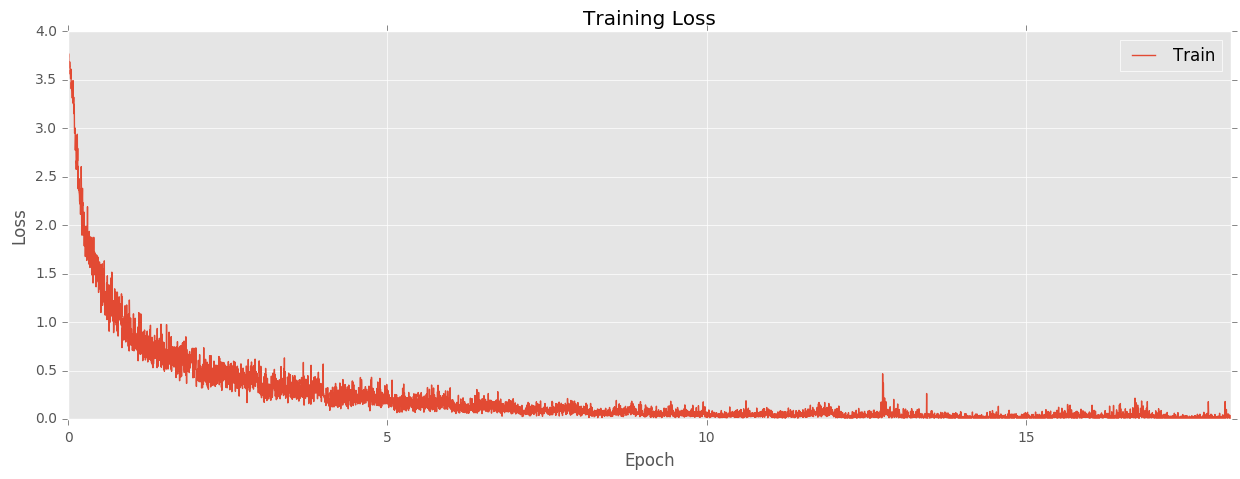

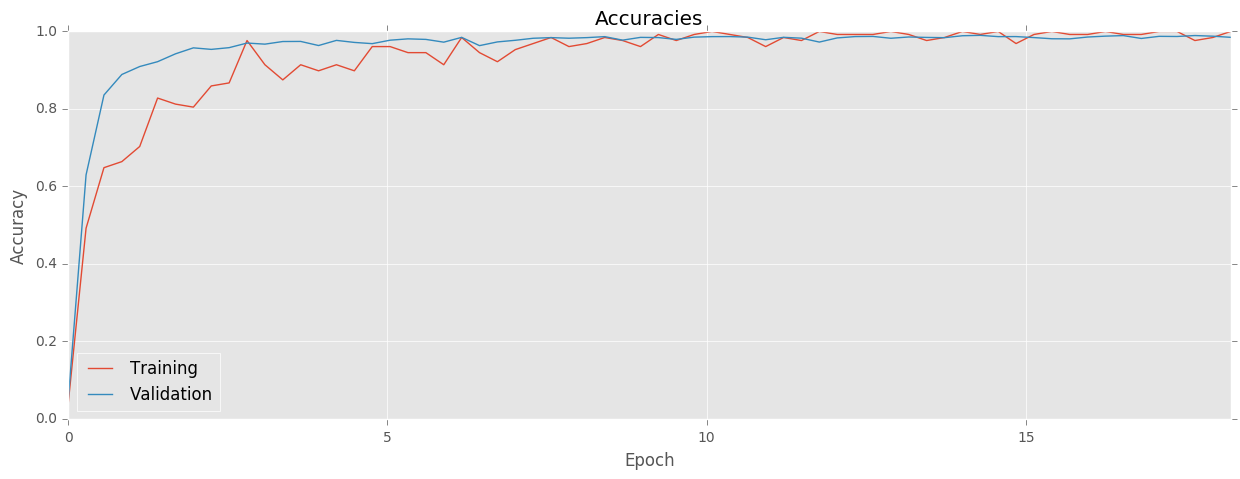

In [19]:
progress_file = "runs/train_progress.p"
with open(progress_file, mode='rb') as f:
    train_losses, train_accuracies, validation_accuracies = pickle.load(f)

plot_train_loss(train_losses)
plot_accuracies({"Training": train_accuracies,
                 "Validation": validation_accuracies})